# 3. In global superstore build regression models for sales, profits, costs based on continent, country, category, and subcategory. Evaluate the models accuracies and errors


# IMPORTING LIBRARIES

In [1]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

# LOADING DATASET

In [3]:
df=pd.read_csv('C:\\Users\\sowndariya\\Desktop\\Prasath sir\\Datasets\\global_superstore_2018.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Margin,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,22-03-17,29-03-17,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,14.00%,39.66,Medium
1,29465,ID-2015-BD116051-42248,01-09-15,04-09-15,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,42.90%,18.72,Medium
2,24598,IN-2017-CA120551-42816,22-03-17,29-03-17,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,3.98%,14.10,Medium
3,24597,IN-2017-CA120551-42816,22-03-17,29-03-17,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,46.96%,11.01,Medium
4,29464,ID-2015-BD116051-42248,01-09-15,04-09-15,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,11.95%,5.72,Medium


# EXPLORATORY DATA ANALYSIS

In [4]:
pd.set_option('max_rows',60000)
pd.set_option('max_columns',25)

In [5]:
df.shape

(51290, 25)

In [6]:
df['Segment'].unique()

array(['Home Office', 'Consumer', 'Corporate'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Product Name    51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Category        51290 non-null 

In [8]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Product Name          0
Sub-Category          0
Category              0
Sales                 0
Quantity              0
Discount              0
Profit                0
Margin                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
df.nunique()

Row ID            51290
Order ID          25728
Order Date         1429
Ship Date          1463
Ship Mode             4
Customer ID       17415
Customer Name       796
Segment               3
Postal Code         631
City               3650
State              1106
Country             165
Region               23
Market                5
Product ID         3788
Product Name       3788
Sub-Category         17
Category              3
Sales             22995
Quantity             14
Discount             27
Profit            24575
Margin             5942
Shipping Cost     16452
Order Priority        4
dtype: int64

In [10]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Product Name       object
Sub-Category       object
Category           object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Margin             object
Shipping Cost     float64
Order Priority     object
dtype: object

In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Product Name',
       'Sub-Category', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Margin', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [12]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Product Name       object
Sub-Category       object
Category           object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Margin             object
Shipping Cost     float64
Order Priority     object
dtype: object

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Product Name',
       'Sub-Category', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Margin', 'Shipping Cost', 'Order Priority'],
      dtype='object')

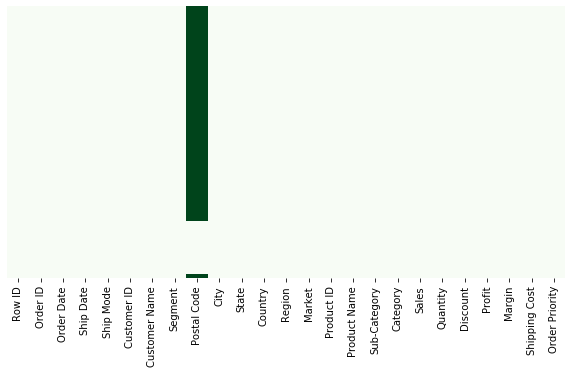

In [14]:
#checking null values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Greens')
plt.show()

In [15]:
#remove unwanted columns
df.drop(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name','Product ID','Quantity','Discount', 'Product Name','Region','Order Priority','City', 'State', 'Country','Postal Code'],axis=1,inplace=True)

In [16]:
df.columns

Index(['Segment', 'Market', 'Sub-Category', 'Category', 'Sales', 'Profit',
       'Margin', 'Shipping Cost'],
      dtype='object')

In [17]:
df.head()

,Segment,Market,Sub-Category,Category,Sales,Profit,Margin,Shipping Cost
0,Home Office,Asia Pacific,Bookcases,Furniture,731.82,102.42,14.00%,39.66
1,Consumer,Asia Pacific,Supplies,Office Supplies,243.54,104.49,42.90%,18.72
2,Home Office,Asia Pacific,Machines,Technology,346.32,13.77,3.98%,14.10
3,Home Office,Asia Pacific,Furnishings,Furniture,169.68,79.68,46.96%,11.01
4,Consumer,Asia Pacific,Envelopes,Office Supplies,203.88,24.36,11.95%,5.72


In [18]:
df['Margin']=df['Margin'].apply(lambda x: x[:-1])

In [19]:
df.head()

,Segment,Market,Sub-Category,Category,Sales,Profit,Margin,Shipping Cost
0,Home Office,Asia Pacific,Bookcases,Furniture,731.82,102.42,14.00,39.66
1,Consumer,Asia Pacific,Supplies,Office Supplies,243.54,104.49,42.90,18.72
2,Home Office,Asia Pacific,Machines,Technology,346.32,13.77,3.98,14.10
3,Home Office,Asia Pacific,Furnishings,Furniture,169.68,79.68,46.96,11.01
4,Consumer,Asia Pacific,Envelopes,Office Supplies,203.88,24.36,11.95,5.72


In [20]:
df['Margin']=df['Margin'].astype('float')

In [21]:
df.dtypes

Segment           object
Market            object
Sub-Category      object
Category          object
Sales            float64
Profit           float64
Margin           float64
Shipping Cost    float64
dtype: object

In [22]:
df.nunique()

Segment              3
Market               5
Sub-Category        17
Category             3
Sales            22995
Profit           24575
Margin            5942
Shipping Cost    16452
dtype: int64

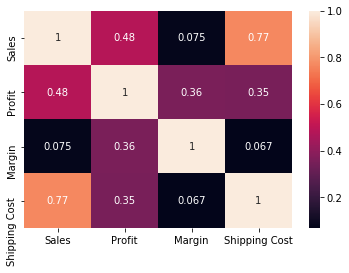

In [23]:
sns.heatmap(df.corr(),annot=True)

# CLUSTERING DATA USING PANDAS- GROUPBY

# MARKET Vs SALES,PROFIT,COST

                    Profit         Sales  Shipping Cost
Market                                                 
Africa         88871.63100  7.837732e+05     88839.4700
Asia Pacific  403176.03800  4.042658e+06    437858.1640
Europe        449551.72350  3.287336e+06    348905.0340
LATAM         221643.48708  2.164605e+06    235025.6150
USCA          304214.41170  2.364129e+06    247457.4204


Text(0.5, 0, 'Market')

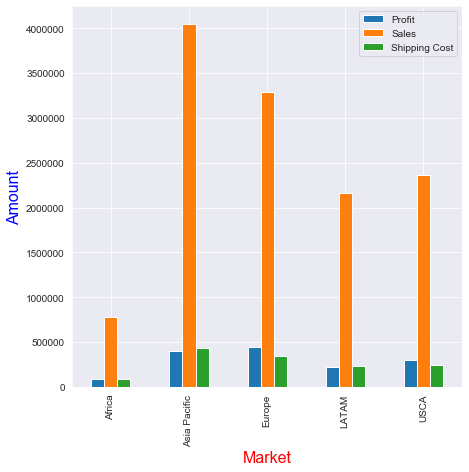

In [24]:
sns.set_style('darkgrid')
print(df.groupby('Market')[['Profit','Sales','Shipping Cost']].sum())
df.groupby('Market')[['Profit','Sales','Shipping Cost']].sum().plot.bar(figsize=(7,7))
plt.ylabel('Amount',fontsize=16,color='b')
plt.xlabel('Market',fontsize=16,color='r')

# SUB-CATEGORY Vs SALES,PROFIT,COST

                    Profit         Sales  Shipping Cost
Sub-Category                                           
Accessories   129626.30620  7.492370e+05     83592.3340
Appliances    141562.58770  1.010536e+06    108307.7460
Art            57829.85930  3.716132e+05     41889.0820
Binders        72433.15160  4.618694e+05     49773.1020
Bookcases     161924.41950  1.466572e+06    155487.9670
Chairs        140396.26750  1.501682e+06    164253.3520
Copiers       258567.54818  1.509436e+06    159501.2049
Envelopes      28849.48730  1.692175e+05     18582.9680
Fasteners      13844.28890  8.949505e+04     10300.0680
Furnishings    46845.43190  3.851560e+05     40981.6560
Labels         14988.92370  7.335028e+04      8840.7250
Machines       58867.87300  7.790601e+05     79149.8485
Paper          58111.65350  2.417875e+05     26864.0850
Phones        216717.00580  1.706824e+06    184953.4920
Storage       108416.68060  1.126813e+06    120793.8520
Supplies       22559.19530  2.428111e+05     249

Text(0.5, 0, 'Sub Categories')

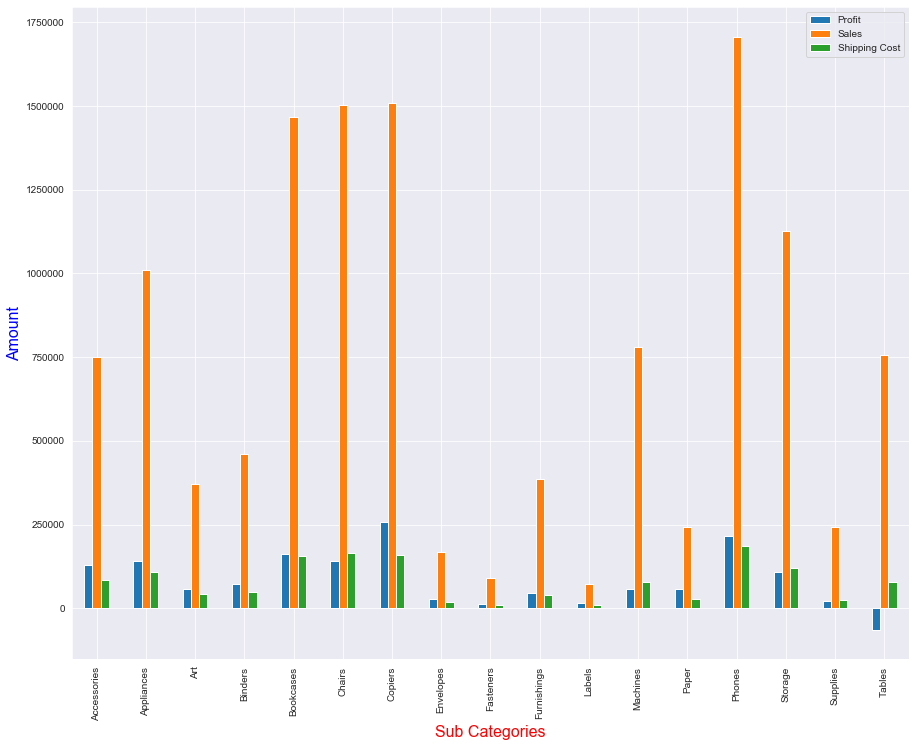

In [25]:
sns.set_style('darkgrid')
print(df.groupby('Sub-Category')[['Profit','Sales','Shipping Cost']].sum())
df.groupby('Sub-Category')[['Profit','Sales','Shipping Cost']].sum().plot.bar(figsize=(15,12))
plt.ylabel('Amount',fontsize=16,color='b')
plt.xlabel('Sub Categories',fontsize=16,color='r')

# CATEGORY Vs SALES,PROFIT,COST

                       Profit         Sales  Shipping Cost
Category                                                  
Furniture        285082.73020  4.110452e+06    440586.3690
Office Supplies  518595.82790  3.787493e+06    410302.4550
Technology       663778.73318  4.744557e+06    507196.8794


Text(0.5, 0, 'Categories')

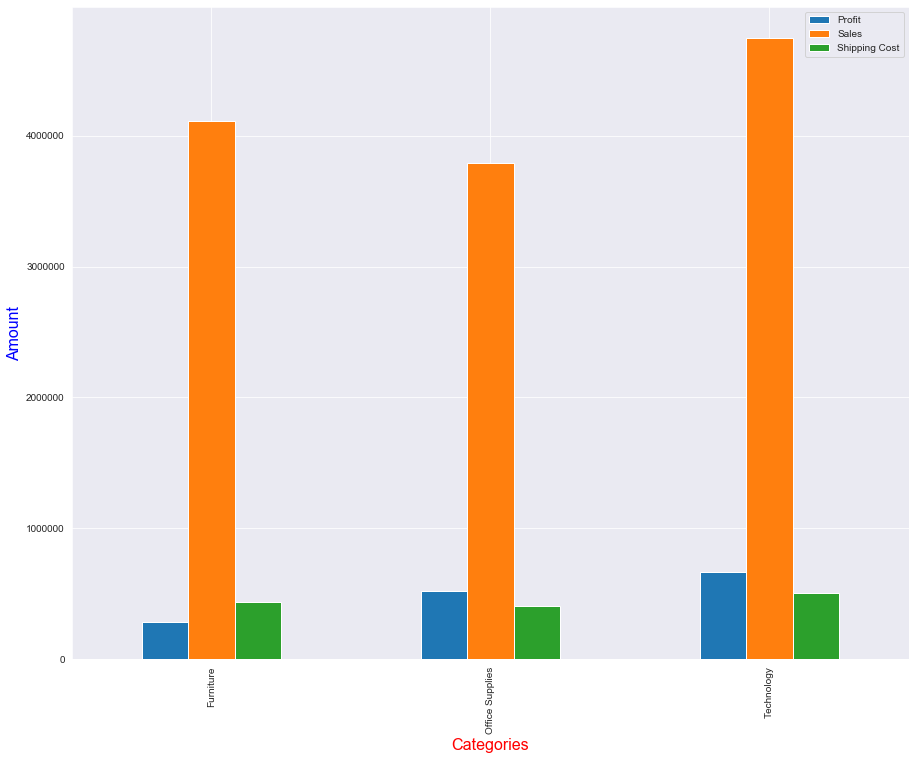

In [26]:
sns.set_style('darkgrid')
print(df.groupby('Category')[['Profit','Sales','Shipping Cost']].sum())
df.groupby('Category')[['Profit','Sales','Shipping Cost']].sum().plot.bar(figsize=(15,12))
plt.ylabel('Amount',fontsize=16,color='b')
plt.xlabel('Categories',fontsize=16,color='r')

# Prediction of Sales for Asia- MARKET

In [27]:
df['Market'].unique()

array(['Asia Pacific', 'Europe', 'Africa', 'LATAM', 'USCA'], dtype=object)

In [28]:
Asia=df[df.Market=='Asia Pacific']
Europe=df[df.Market=='Europe']
Africa=df[df.Market=='Africa']
LATAM=df[df.Market=='LATAM']
USCA=df[df.Market=='USCA']


In [29]:
# ASIA

In [30]:
Asia.shape

(14302, 8)

In [31]:
Asia.head()

,Segment,Market,Sub-Category,Category,Sales,Profit,Margin,Shipping Cost
0,Home Office,Asia Pacific,Bookcases,Furniture,731.82,102.42,14.00,39.66
1,Consumer,Asia Pacific,Supplies,Office Supplies,243.54,104.49,42.90,18.72
2,Home Office,Asia Pacific,Machines,Technology,346.32,13.77,3.98,14.10
3,Home Office,Asia Pacific,Furnishings,Furniture,169.68,79.68,46.96,11.01
4,Consumer,Asia Pacific,Envelopes,Office Supplies,203.88,24.36,11.95,5.72


In [32]:
#independent and target variable
x=Asia.drop(['Sales'],axis=1)
y=Asia['Sales']

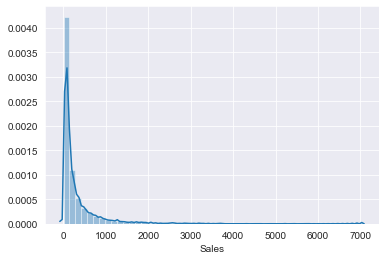

In [33]:
sns.distplot(y, hist=True)
plt.show()

In [34]:
#making right skewed target var to normally distributed form
y_log=np.log1p(y)
y_log.head()

0    6.596900
1    5.499379
2    5.850247
3    5.139790
4    5.322424
Name: Sales, dtype: float64

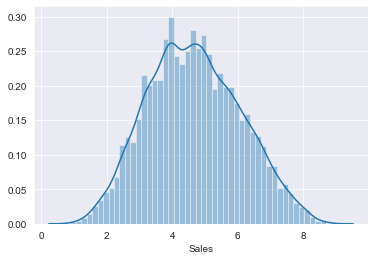

In [35]:
sns.distplot(y_log)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CDDA44D08>,
      dtype=object)

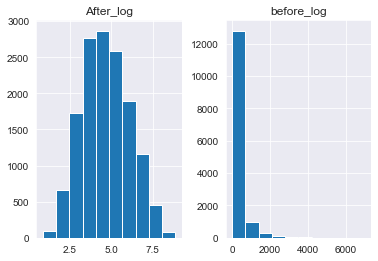

In [36]:
#comparison
graph=pd.DataFrame({'before_log':y,'After_log':y_log})
graph.hist()

In [37]:
#splitting categorical and numerical variable
categorical=[col for col in Asia.columns.values if Asia[col].dtype=='object']
df_cat1=Asia[categorical]
df_num1=Asia.drop(categorical,axis=1)

In [38]:
df_num1.drop('Sales',axis=1,inplace=True)

In [39]:
df_num1.shape

(14302, 3)

In [40]:
y_log.shape

(14302,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CDD27A908>,
      dtype=object)

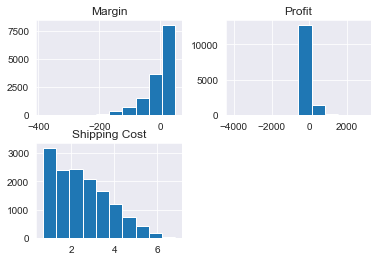

In [41]:
#checking skewness 
df_num1_skew=df_num1.skew()
df_num1_skew=df_num1_skew[df_num1_skew>0.75]
df_num1[df_num1_skew.index]=np.log1p(df_num1[df_num1_skew.index])
df_num1.hist()

In [42]:
df_num1.isnull().sum()

Profit           0
Margin           0
Shipping Cost    0
dtype: int64

In [43]:
#Mean normalisation
df_num1=(df_num1-df_num1.mean())/(df_num1.max()-df_num1.min())
df_num1.head()

,Profit,Margin,Shipping Cost
0,0.010562,0.036862,0.196171
1,0.010857,0.103296,0.078151
2,-0.002052,0.013829,0.034614
3,0.007327,0.112629,-0.002729
4,-0.000545,0.032150,-0.097432


In [44]:
# dummy encoding for categorical variables
df_cat1=pd.get_dummies(df_cat1,drop_first=True)


In [45]:
# new dataset after data cleaning
data=pd.concat([df_num1,df_cat1],axis=1)
data.head()

,Profit,Margin,Shipping Cost,Segment_Corporate,Segment_Home Office,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Category_Office Supplies,Category_Technology
0,0.010562,0.036862,0.196171,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.010857,0.103296,0.078151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,-0.002052,0.013829,0.034614,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.007327,0.112629,-0.002729,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-0.000545,0.032150,-0.097432,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [46]:
data.dtypes

Profit                      float64
Margin                      float64
Shipping Cost               float64
Segment_Corporate             uint8
Segment_Home Office           uint8
Sub-Category_Appliances       uint8
Sub-Category_Art              uint8
Sub-Category_Binders          uint8
Sub-Category_Bookcases        uint8
Sub-Category_Chairs           uint8
Sub-Category_Copiers          uint8
Sub-Category_Envelopes        uint8
Sub-Category_Fasteners        uint8
Sub-Category_Furnishings      uint8
Sub-Category_Labels           uint8
Sub-Category_Machines         uint8
Sub-Category_Paper            uint8
Sub-Category_Phones           uint8
Sub-Category_Storage          uint8
Sub-Category_Supplies         uint8
Sub-Category_Tables           uint8
Category_Office Supplies      uint8
Category_Technology           uint8
dtype: object

In [47]:
data.isnull().sum()

Profit                      0
Margin                      0
Shipping Cost               0
Segment_Corporate           0
Segment_Home Office         0
Sub-Category_Appliances     0
Sub-Category_Art            0
Sub-Category_Binders        0
Sub-Category_Bookcases      0
Sub-Category_Chairs         0
Sub-Category_Copiers        0
Sub-Category_Envelopes      0
Sub-Category_Fasteners      0
Sub-Category_Furnishings    0
Sub-Category_Labels         0
Sub-Category_Machines       0
Sub-Category_Paper          0
Sub-Category_Phones         0
Sub-Category_Storage        0
Sub-Category_Supplies       0
Sub-Category_Tables         0
Category_Office Supplies    0
Category_Technology         0
dtype: int64

In [48]:
# Building Models using different Algorithms
X=data
Y=y_log


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train,Y_train) 
print('[0]Linear Regression Training Accuracy:',lin.score(X_train,Y_train))
y_pred1=lin.predict(X_test)


from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
print('[1]knn Training Accuracy:' ,knn.score(X_train,Y_train))  
y_pred2=knn.predict(X_test)


from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train,Y_train)
print('[2]xg Training Accuracy:', xg.score(X_train,Y_train))
y_pred3=xg.predict(X_test)


from sklearn.svm import SVR
svr_lin=SVR()
svr_lin.fit(X_train,Y_train)
print('[3]svr-lin Training Accuracy:' ,svr_lin.score(X_train,Y_train)) 
y_pred4=svr_lin.predict(X_test)


from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train,Y_train)
print('[4]decision tee Training Accuracy:', tree.score(X_train,Y_train))  
y_pred5=tree.predict(X_test)

from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,Y_train)
print('[5]random forest Training Accuracy:', forest.score(X_train,Y_train)) 
y_pred6=forest.predict(X_test)

from sklearn.metrics import r2_score

print('Linear Regression r2_Score :',r2_score(y_pred1,Y_test))
print('Knn Regressor r2_Score :',r2_score(y_pred2,Y_test))
print('XGBoost Regressor r2_Score :',r2_score(y_pred4,Y_test))
print('SVRegressor r2_Score :',r2_score(y_pred3,Y_test))
print('Decision Tree Regressor r2_Score :',r2_score(y_pred5,Y_test))
print('Random Forest Regressor r2_Score :',r2_score(y_pred6,Y_test))

[0]Linear Regression Training Accuracy: 0.8518185910507118
[1]knn Training Accuracy: 0.9017662556965421
[2]xg Training Accuracy: 0.9971147957891325
[3]svr-lin Training Accuracy: 0.8624044904409597
[4]decision tee Training Accuracy: 0.9999999996267088
[5]random forest Training Accuracy: 0.9972751267896206
Linear Regression r2_Score : 0.8315098314977551
Knn Regressor r2_Score : 0.8288683717793565
XGBoost Regressor r2_Score : 0.8417521772624297
SVRegressor r2_Score : 0.9890822903543509
Decision Tree Regressor r2_Score : 0.961977633923664
Random Forest Regressor r2_Score : 0.9796466461100708


In [49]:
# Build Model using Best Algorithm with r2-score=0.989
from sklearn.svm import SVR
svr_lin=SVR('linear')
svr_lin.fit(X_train,Y_train)
y_pred4=svr_lin.predict(X_test)


In [50]:
print('SVRegressor r2_Score :',r2_score(y_pred3,Y_test))


SVRegressor r2_Score : 0.9890822903543509


In [51]:
svr_lin.coef_,svr_lin.intercept_

(array([[ 7.10011471e-01,  1.24955601e+00,  4.93624515e+00,
          1.02878380e-02,  1.51194725e-03,  5.13670015e-01,
         -1.92146855e-02, -2.89555827e-01,  2.02879031e-01,
          6.09776763e-02,  2.70773150e-01, -5.23413262e-02,
         -2.62396575e-01, -2.04165991e-01, -4.81252112e-01,
          1.90906280e-01, -2.95141081e-02,  1.95714152e-01,
          1.51271754e-01,  9.66718535e-02,  4.15295113e-01,
         -3.72661012e-01, -1.02324818e-01]]),
 array([4.91131963]))

# Prediction of Profit for Bookcase SUB-CATEGORY

In [52]:
df['Sub-Category'].unique()

array(['Bookcases', 'Supplies', 'Machines', 'Furnishings', 'Envelopes',
       'Tables', 'Chairs', 'Phones', 'Appliances', 'Copiers', 'Storage',
       'Paper', 'Accessories', 'Art', 'Binders', 'Labels', 'Fasteners'],
      dtype=object)

In [53]:
bookcase=df[df['Sub-Category']=='Bookcases']
supplies=df[df['Sub-Category']=='Supplies']
Machines=df[df['Sub-Category']=='Machines']
furnishing=df[df['Sub-Category']=='Furnishings']
envelopes=df[df['Sub-Category']=='Envelopes']
Tables=df[df['Sub-Category']=='Tables']
chairs=df[df['Sub-Category']=='Chairs']
phones=df[df['Sub-Category']=='Phones']
appliances=df[df['Sub-Category']=='Appliances']
copiers=df[df['Sub-Category']=='Copiers']
storage=df[df['Sub-Category']=='Storage']
paper=df[df['Sub-Category']=='Paper']
accessories=df[df['Sub-Category']=='Accessories']
art=df[df['Sub-Category']=='Art']
binders=df[df['Sub-Category']=='Binders']
labels=df[df['Sub-Category']=='Labels']
fasteners=df[df['Sub-Category']=='Fasteners']

In [54]:
#Data Preparation
bookcase.shape

(2411, 8)

In [55]:
bookcase.columns

Index(['Segment', 'Market', 'Sub-Category', 'Category', 'Sales', 'Profit',
       'Margin', 'Shipping Cost'],
      dtype='object')

In [56]:
bookcase.drop(['Sub-Category'],axis=1,inplace=True)

In [57]:
bookcase.head()

,Segment,Market,Category,Sales,Profit,Margin,Shipping Cost
0,Home Office,Asia Pacific,Furniture,731.82,102.42,14.00,39.66
6,Home Office,Asia Pacific,Furniture,2070.15,848.70,41.00,185.01
65,Corporate,Europe,Furniture,363.75,39.99,10.99,33.38
66,Consumer,Europe,Furniture,414.03,202.86,49.00,26.48
72,Consumer,Africa,Furniture,1447.44,506.52,34.99,199.04


In [58]:
#Statistical Summary
bookcase.describe(include=['object']).transpose()

,count,unique,top,freq
Segment,2411,3,Consumer,1235
Market,2411,5,Asia Pacific,764
Category,2411,1,Furniture,2411


In [59]:
bookcase.describe(include=['float']).transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,2411.0,608.283800,602.487519,35.490,230.2720,411.332,755.09250,5667.87
Profit,2411.0,67.160688,242.859457,-1981.395,-17.9000,44.970,136.04625,2316.51
Margin,2411.0,1.488731,44.305010,-230.080,-5.5600,12.000,28.98000,50.00
Shipping Cost,2411.0,64.491069,77.644526,1.190,18.5565,38.151,76.96900,658.35


In [60]:
bookcase.nunique()

Segment             3
Market              5
Category            1
Sales            1760
Profit           1978
Margin            666
Shipping Cost    2275
dtype: int64

In [61]:
#Splitting Target Variable
target=bookcase['Profit']
target.head()

0     102.42
6     848.70
65     39.99
66    202.86
72    506.52
Name: Profit, dtype: float64

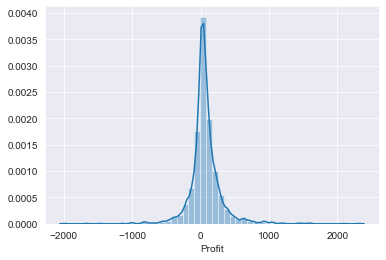

In [62]:
sns.distplot(target,hist=True)

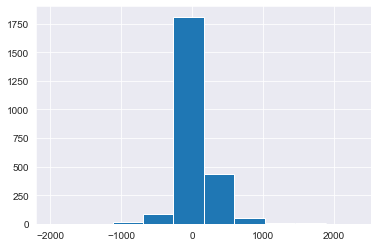

In [63]:
target.hist()

In [64]:
bookcase.dtypes

Segment           object
Market            object
Category          object
Sales            float64
Profit           float64
Margin           float64
Shipping Cost    float64
dtype: object

In [65]:
categ=[col for col in bookcase.columns.values if bookcase[col].dtype=='object']
df_cat2=bookcase[categ]
df_num2=bookcase.drop(categ,axis=1)

In [66]:
df_num2.drop('Profit',axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CE1BAC808>,
      dtype=object)

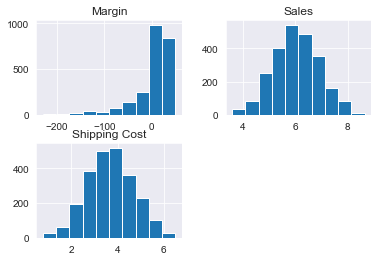

In [67]:
#checking Skewness
df_num2_skew=df_num2.skew()
df_num2_skew=df_num2_skew[df_num2_skew>0.75]
df_num2[df_num2_skew.index]=np.log1p(df_num2[df_num2_skew.index])
df_num2.hist()

In [68]:
#Mean Normalisation
df_num2=(df_num2-df_num2.mean())/(df_num2.max()-df_num2.min())
df_num2.head()

,Sales,Margin,Shipping Cost
0,0.111406,0.044670,0.005264
6,0.317315,0.141071,0.271685
65,-0.026868,0.033923,-0.024131
66,-0.001274,0.169635,-0.063382
72,0.246440,0.119613,0.284426


In [69]:
#Dummy Variables
df_cat2=pd.get_dummies(df_cat2,drop_first=True)

In [70]:
data2=pd.concat([df_num2,df_cat2],axis=1)

In [71]:
data2.head()

,Sales,Margin,Shipping Cost,Segment_Corporate,Segment_Home Office,Market_Asia Pacific,Market_Europe,Market_LATAM,Market_USCA
0,0.111406,0.044670,0.005264,0,1,1,0,0,0
6,0.317315,0.141071,0.271685,0,1,1,0,0,0
65,-0.026868,0.033923,-0.024131,1,0,0,1,0,0
66,-0.001274,0.169635,-0.063382,0,0,0,1,0,0
72,0.246440,0.119613,0.284426,0,0,0,0,0,0


In [72]:
#Building Models using different Algorithms
X=data2
Y=target

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train,Y_train) 
print('[0]Linear Regression Training Accuracy:',lin.score(X_train,Y_train))
y_pred1=lin.predict(X_test)


from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
print('[1]knn Training Accuracy:' ,knn.score(X_train,Y_train))  
y_pred2=knn.predict(X_test)


from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train,Y_train)
print('[2]xg Training Accuracy:', xg.score(X_train,Y_train))
y_pred3=xg.predict(X_test)


from sklearn.svm import SVR
svr_lin=SVR()
svr_lin.fit(X_train,Y_train)
print('[3]svr-lin Training Accuracy:' ,svr_lin.score(X_train,Y_train)) 
y_pred4=svr_lin.predict(X_test)


from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train,Y_train)
print('[4]decision tee Training Accuracy:', tree.score(X_train,Y_train))  
y_pred5=tree.predict(X_test)

from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,Y_train)
print('[5]random forest Training Accuracy:', forest.score(X_train,Y_train)) 
y_pred6=forest.predict(X_test)

print('Linear Regression r2_Score :',r2_score(y_pred1,Y_test))
print('Knn Regressor r2_Score :',r2_score(y_pred2,Y_test))
print('XGBoost Regressor r2_Score :',r2_score(y_pred4,Y_test))
print('SVRegressor r2_Score :',r2_score(y_pred3,Y_test))
print('Decision Tree Regressor r2_Score :',r2_score(y_pred5,Y_test))
print('Random Forest Regressor r2_Score :',r2_score(y_pred6,Y_test))

[0]Linear Regression Training Accuracy: 0.43132431314414055
[1]knn Training Accuracy: 0.8398027889623457
[2]xg Training Accuracy: 0.9999167772849591
[3]svr-lin Training Accuracy: 0.08987224287426798
[4]decision tee Training Accuracy: 1.0
[5]random forest Training Accuracy: 0.9963968305598534
Linear Regression r2_Score : -0.30748095617332516
Knn Regressor r2_Score : 0.43180039436554085
XGBoost Regressor r2_Score : -89.77739487131078
SVRegressor r2_Score : 0.9888016523836042
Decision Tree Regressor r2_Score : 0.9503585680651445
Random Forest Regressor r2_Score : 0.9738175809765164


In [73]:
#Best Algorithm
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,Y_train)
y_pred6=forest.predict(X_test)
print('Random Forest Regressor r2_Score :',r2_score(y_pred6,Y_test))


Random Forest Regressor r2_Score : 0.9733953511574012


# Prediction of Cost for Furniture CATEGORY

In [74]:
#data preparation
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [75]:
Furniture=df[df['Category']=='Furniture']
Office=df[df['Category']=='Office Supplies']
Tech=df[df['Category']=='Technology']

In [76]:
Furniture.shape

(9860, 8)

In [77]:
Furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9860 entries, 0 to 51273
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Segment        9860 non-null   object 
 1   Market         9860 non-null   object 
 2   Sub-Category   9860 non-null   object 
 3   Category       9860 non-null   object 
 4   Sales          9860 non-null   float64
 5   Profit         9860 non-null   float64
 6   Margin         9860 non-null   float64
 7   Shipping Cost  9860 non-null   float64
dtypes: float64(4), object(4)
memory usage: 693.3+ KB


In [78]:
#statistical summary
Furniture.describe()

,Sales,Profit,Margin,Shipping Cost
count,9860.000000,9860.000000,9860.000000,9860.000000
mean,416.881531,28.913056,0.837764,44.684216
std,553.291298,205.924556,44.705601,72.580550
min,1.892000,-2750.280000,-473.350000,1.040000
25%,91.896000,-12.300075,-8.750000,7.380000
50%,220.590300,15.535600,11.305000,20.292500
75%,510.013125,69.606000,28.750000,50.907500
max,5759.964000,2316.510000,50.000000,923.630000


In [79]:
Furniture.describe(include=['object']).transpose()

,count,unique,top,freq
Segment,9860,3,Consumer,5087
Market,9860,5,Asia Pacific,2923
Sub-Category,9860,4,Chairs,3434
Category,9860,1,Furniture,9860


In [80]:
Furniture.describe(include=['float']).transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,9860.0,416.881531,553.291298,1.892,91.896000,220.5903,510.013125,5759.964
Profit,9860.0,28.913056,205.924556,-2750.280,-12.300075,15.5356,69.606000,2316.510
Margin,9860.0,0.837764,44.705601,-473.350,-8.750000,11.3050,28.750000,50.000
Shipping Cost,9860.0,44.684216,72.580550,1.040,7.380000,20.2925,50.907500,923.630


In [81]:
Furniture.nunique()

Segment             3
Market              5
Sub-Category        4
Category            1
Sales            6752
Profit           7389
Margin           1888
Shipping Cost    6902
dtype: int64

In [82]:
target1=Furniture['Shipping Cost']
target1.head()


0     39.66
3     11.01
5    835.57
6    185.01
7    106.41
Name: Shipping Cost, dtype: float64

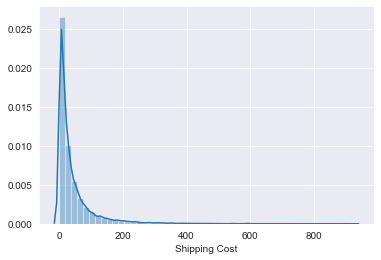

In [83]:
sns.distplot(target1,hist=True)

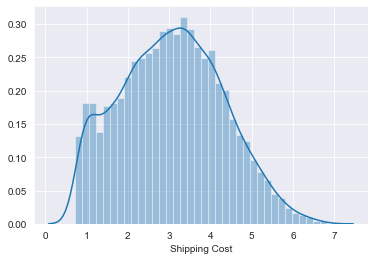

In [84]:
target1log=np.log1p(target1)
sns.distplot(target1log)

In [85]:
data3=Furniture.drop(['Shipping Cost'],axis=1)
data3.head()

,Segment,Market,Sub-Category,Category,Sales,Profit,Margin
0,Home Office,Asia Pacific,Bookcases,Furniture,731.82,102.42,14.00
3,Home Office,Asia Pacific,Furnishings,Furniture,169.68,79.68,46.96
5,Corporate,Asia Pacific,Tables,Furniture,4626.15,647.55,14.00
6,Home Office,Asia Pacific,Bookcases,Furniture,2070.15,848.70,41.00
7,Corporate,Asia Pacific,Chairs,Furniture,914.34,356.58,39.00


In [86]:
#splitting categorical and numerical datas
categorical3=[col for col in Furniture.columns.values if Furniture[col].dtype=='object']
df_cat3=data3[categorical3]
df_num3=data3.drop(df_cat3,axis=1)

In [87]:
df_cat3.head()

,Segment,Market,Sub-Category,Category
0,Home Office,Asia Pacific,Bookcases,Furniture
3,Home Office,Asia Pacific,Furnishings,Furniture
5,Corporate,Asia Pacific,Tables,Furniture
6,Home Office,Asia Pacific,Bookcases,Furniture
7,Corporate,Asia Pacific,Chairs,Furniture


In [88]:
df_num3.head()

,Sales,Profit,Margin
0,731.82,102.42,14.00
3,169.68,79.68,46.96
5,4626.15,647.55,14.00
6,2070.15,848.70,41.00
7,914.34,356.58,39.00


In [89]:
# check skewness
df_num3_skew=df_num3.skew()
df_num3_skew=df_num3_skew[df_num3_skew>0.75]
df_num3[df_num3_skew.index]=np.log1p(df_num3[df_num3_skew.index])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CDF5BA5C8>,
      dtype=object)

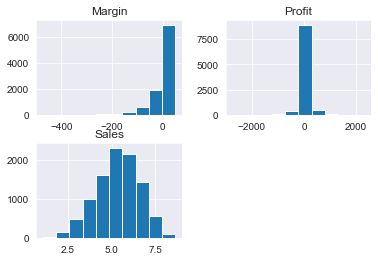

In [90]:
df_num3.hist()

In [91]:
# mean normalisation
df_num3=(df_num3-df_num3.mean())/(df_num3.max()-df_num3.min())
df_num3.head()

,Sales,Profit,Margin
0,0.164520,0.014508,0.025150
3,-0.027282,0.010020,0.088129
5,0.407092,0.122096,0.025150
6,0.301281,0.161796,0.076741
7,0.193795,0.064670,0.072919


In [92]:
#dummy variables
df_cat3=pd.get_dummies(df_cat3,drop_first=True)
data3=pd.concat([df_num3,df_cat3],axis=1)

In [93]:
data3.head()

,Sales,Profit,Margin,Segment_Corporate,Segment_Home Office,Market_Asia Pacific,Market_Europe,Market_LATAM,Market_USCA,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables
0,0.164520,0.014508,0.025150,0,1,1,0,0,0,0,0,0
3,-0.027282,0.010020,0.088129,0,1,1,0,0,0,0,1,0
5,0.407092,0.122096,0.025150,1,0,1,0,0,0,0,0,1
6,0.301281,0.161796,0.076741,0,1,1,0,0,0,0,0,0
7,0.193795,0.064670,0.072919,1,0,1,0,0,0,1,0,0


In [94]:
#build models
X=data3
Y=target1

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train,Y_train) 
print('[0]Linear Regression Training Accuracy:',lin.score(X_train,Y_train))
y_pred1=lin.predict(X_test)


from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
print('[1]knn Training Accuracy:' ,knn.score(X_train,Y_train))  
y_pred2=knn.predict(X_test)


from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train,Y_train)
print('[2]xg Training Accuracy:', xg.score(X_train,Y_train))
y_pred3=xg.predict(X_test)


from sklearn.svm import SVR
svr_lin=SVR()
svr_lin.fit(X_train,Y_train)
print('[3]svr-lin Training Accuracy:' ,svr_lin.score(X_train,Y_train)) 
y_pred4=svr_lin.predict(X_test)


from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train,Y_train)
print('[4]decision tee Training Accuracy:', tree.score(X_train,Y_train))  
y_pred5=tree.predict(X_test)

from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,Y_train)
print('[5]random forest Training Accuracy:', forest.score(X_train,Y_train)) 
y_pred6=forest.predict(X_test)

print('Linear Regression r2_Score :',r2_score(y_pred1,Y_test))
print('Knn Regressor r2_Score :',r2_score(y_pred2,Y_test))
print('XGBoost Regressor r2_Score :',r2_score(y_pred4,Y_test))
print('SVRegressor r2_Score :',r2_score(y_pred3,Y_test))
print('Decision Tree Regressor r2_Score :',r2_score(y_pred5,Y_test))
print('Random Forest Regressor r2_Score :',r2_score(y_pred6,Y_test))

[0]Linear Regression Training Accuracy: 0.4281329809997547
[1]knn Training Accuracy: 0.6821723032268161
[2]xg Training Accuracy: 0.9225407922765179
[3]svr-lin Training Accuracy: 0.18764065842500366
[4]decision tee Training Accuracy: 0.991018457114569
[5]random forest Training Accuracy: 0.9320249380330068
Linear Regression r2_Score : -0.3551032032495347
Knn Regressor r2_Score : -0.12717949211771584
XGBoost Regressor r2_Score : -11.535234494060349
SVRegressor r2_Score : 0.20792922128254188
Decision Tree Regressor r2_Score : 0.16827100371911907
Random Forest Regressor r2_Score : 0.2640457092956413


In [95]:
# Noone model gave good r2-score.so we have to change dependent variable

# Prediction of Sales for Furniture category

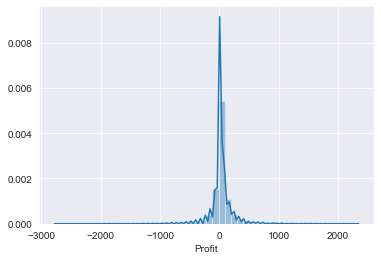

In [96]:
#target profit
target2=Furniture['Profit']
target2.head()
sns.distplot(target2,hist=True)


In [97]:
#independent variables
data4=Furniture.drop(['Profit'],axis=1)
data4.head()



,Segment,Market,Sub-Category,Category,Sales,Margin,Shipping Cost
0,Home Office,Asia Pacific,Bookcases,Furniture,731.82,14.00,39.66
3,Home Office,Asia Pacific,Furnishings,Furniture,169.68,46.96,11.01
5,Corporate,Asia Pacific,Tables,Furniture,4626.15,14.00,835.57
6,Home Office,Asia Pacific,Bookcases,Furniture,2070.15,41.00,185.01
7,Corporate,Asia Pacific,Chairs,Furniture,914.34,39.00,106.41


In [98]:
#splitting cat and num var
categorical4=[col for col in Furniture.columns.values if Furniture[col].dtype=='object']
df_cat4=data4[categorical3]
df_num4=data4.drop(df_cat4,axis=1)



In [99]:
#checking skewness
df_num4_skew=df_num4.skew()
df_num4_skew=df_num4_skew[df_num4_skew>0.75]
df_num4[df_num4_skew.index]=np.log1p(df_num4[df_num4_skew.index])




In [100]:
#mean normalisation
df_num4=(df_num4-df_num4.mean())/(df_num4.max()-df_num4.min())
df_num4.head()



,Sales,Margin,Shipping Cost
0,0.164520,0.025150,0.105674
3,-0.027282,0.088129,-0.093707
5,0.407092,0.025150,0.600090
6,0.301281,0.076741,0.354275
7,0.193795,0.072919,0.264493


In [101]:
# dummy variable
df_cat4=pd.get_dummies(df_cat4,drop_first=True)
data4=pd.concat([df_num4,df_cat4],axis=1)

In [102]:
# build models
X=data4
Y=target2

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train,Y_train) 
print('[0]Linear Regression Training Accuracy:',lin.score(X_train,Y_train))
y_pred1=lin.predict(X_test)


from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
print('[1]knn Training Accuracy:' ,knn.score(X_train,Y_train))  
y_pred2=knn.predict(X_test)


from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train,Y_train)
print('[2]xg Training Accuracy:', xg.score(X_train,Y_train))
y_pred3=xg.predict(X_test)


from sklearn.svm import SVR
svr_lin=SVR()
svr_lin.fit(X_train,Y_train)
print('[3]svr-lin Training Accuracy:' ,svr_lin.score(X_train,Y_train)) 
y_pred4=svr_lin.predict(X_test)


from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train,Y_train)
print('[4]decision tee Training Accuracy:', tree.score(X_train,Y_train))  
y_pred5=tree.predict(X_test)

from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,Y_train)
print('[5]random forest Training Accuracy:', forest.score(X_train,Y_train)) 
y_pred6=forest.predict(X_test)

print('Linear Regression r2_Score :',r2_score(y_pred1,Y_test))
print('Knn Regressor r2_Score :',r2_score(y_pred2,Y_test))
print('XGBoost Regressor r2_Score :',r2_score(y_pred4,Y_test))
print('SVRegressor r2_Score :',r2_score(y_pred3,Y_test))
print('Decision Tree Regressor r2_Score :',r2_score(y_pred5,Y_test))
print('Random Forest Regressor r2_Score :',r2_score(y_pred6,Y_test))

[0]Linear Regression Training Accuracy: 0.3488079194385607
[1]knn Training Accuracy: 0.7799612801189464
[2]xg Training Accuracy: 0.9997569641337858
[3]svr-lin Training Accuracy: 0.085464293110035
[4]decision tee Training Accuracy: 0.9999999999999968
[5]random forest Training Accuracy: 0.9983044147803225
Linear Regression r2_Score : -0.8133699121688771
Knn Regressor r2_Score : -0.10435045679213939
XGBoost Regressor r2_Score : -70.81790746978268
SVRegressor r2_Score : 0.9665975339713826
Decision Tree Regressor r2_Score : 0.9432648126829686
Random Forest Regressor r2_Score : 0.9620137123651871


In [103]:
#best model
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,Y_train)
y_pred6=forest.predict(X_test)
print('Random Forest Regressor r2_Score :',r2_score(y_pred6,Y_test))

Random Forest Regressor r2_Score : 0.9607948730184692


### we have built a model to predict the profit for furniture category same as profit we can build model to predict sales and cost for furniture.

### Likewise we have to follow the same procedure  for {'Office Supplies', 'Technology'} to predict Profit, cost and sales.